# Homework 01

Congratulations! You've managed to open this Juypter notebook on either Github or on your local machine.

Help for Jupyter Notebooks can be found in the Jupyter Lab by going to `Help > Notebook Reference`. You can also go to the [Notebook basics](https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Notebook%20Basics.html) documentation.

The basics are that you can write *markdown* cells that have math, words, and other markdown (like Rmarkdown!)... and *code* cells that, well, have code and display the output below (as in Rmarkdown). Switch *mode* to change between the two (sidebar will change colors).

If you want to export your document to .pdf (you don't have to!), you an go to `File > Export Notebook As... > PDF`. To do this, I had to install the *Inkscape* application. (I did this with the [Chocolatey](https://chocolatey.org/) package manager on Windows. You can probably do this with [Homewbrew](https://brew.sh/) on a Mac)

# Instructions

Your homework is to generate 3d plots of a quadratic function in $\mathbb R^2$ and to examine the relationship between eigenvalues of the Hessian matrices, shapes of the functions, and the (possible) existence of minima and maxima.

You can find the documentation for `Plots.jl` at <http://docs.juliaplots.org/latest/>

For the following functions

\begin{align}
    f^a(x,y) &= -x^2       - y^2 \\
    f^b(x,y) &= -x^2 +  xy - y^2 \\
    f^c(x,y) &= -x^2 + 2xy - y^2 \\
    f^d(x,y) &= -x^2 + 3xy - y^2 
\end{align}

1. Write the Hessian matrix in \LaTeX

2. Compute the determinants by hand. Are the Hessians PD, PSD, NSD, or ND? What does this imply about convexity / concavity of the function? What about the existence of a minimum or maximum over the domain $\mathbb R^2$?

3. `@assert` statements are wonderful to include in your functions because they make sure that the inputs meet certain assumptions... such as that the length of two vectors is the same. Using them regularly can help you avoid errors

    Use an `@assert` statement to check that your determinants computed by hand are correct. See what Julia does when you put the wrong determinanmt in. See [`LinearAlgebra.det`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/index.html#LinearAlgebra.det) docs

    ```julia
    @assert det(Ha) == ???
    ```

4. Compute the eigenvalues of your matrix using [`LinearAlgebra.eigvals`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/index.html#LinearAlgebra.eigvals)

5. Create a function in Julia to compute $f^a, f^b, f^c, f^d$ as above. Plot them!


To submit your homework, commit this notebook to your personal homework repo, push it, and issue a pull request to turn it in to me.

# Top of your Julia Code

In [19]:
# Load libraries first of all
using LinearAlgebra  # load LinearAlgebra standard library
using Plots          # loads the Plots module

In [20]:
# tells Plots to use the GR() backend.
#    Note: for interactive 3d plots, you can also install 
#    PyPlot or PlotlyJS and try using those. You might 
#    need to use Atom or the REPL to get the interactivity
gr()

Plots.GRBackend()

In [21]:
# define a range we can iterate over
xrange = -3.0 : 0.1 : 3.0

-3.0:0.1:3.0

# Question 1

$$
f^a(x,y) = -x^2 - y^2
$$   

## Part 1a 

Hessian is $H^a = \begin{bmatrix} -2 & 0 \\ 0 & -2\end{bmatrix}$

## Part 1b

Determinant is $|H^a| = 4$, so the matrix is ND, and it has a global maximum at 0. 

In [22]:
# define the Hessian for H^a. 
# Note:
#     Julia in Jupyter Notebooks and Atom can handle latexy characters
#     I got fancy by typing H\^a [tab] and getting a superscript
#     We could have also gotten greek letters with \beta [tab]
#     or (very important) approximately equals with \approx [tab]

Hᵃ = [-2 0 ; 0 -2]

2×2 Array{Int64,2}:
 -2   0
  0  -2

## Part 1c

In [23]:
@assert det(Hᵃ) == 4

## Part 1d

In [24]:
eigvals(Hᵃ)

2-element Array{Float64,1}:
 -2.0
 -2.0

In [25]:
# functions to plot
fa(x,y) = -x^2 - y^2

fa (generic function with 1 method)

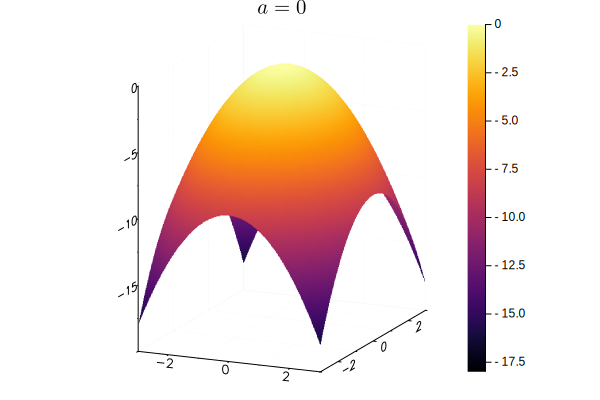

In [14]:
plot(xrange, xrange, fa, st = :surface, title = "\$a=0\$")

# Question 2

$$
f^a(x,y) = -x^2 +xy - y^2
$$   

## Part 2a 

Hessian is $H^b = \begin{bmatrix} -2 & 1 \\ 1 & -2\end{bmatrix}$

## Part 2b

Determinant is $|H^a| = 3$, so the matrix is ND, and it has a global maximum at 0. 

In [26]:
Hᵇ = [-2 1 ; 1 -2]

2×2 Array{Int64,2}:
 -2   1
  1  -2

## Part 2c 

In [27]:
@assert det(Hᵇ) == 3

## Part 2d

In [28]:
eigvals(Hᵇ)

2-element Array{Float64,1}:
 -3.0
 -1.0

In [31]:
fb(x,y) = -x^2 +x*y - y^2

fb (generic function with 1 method)

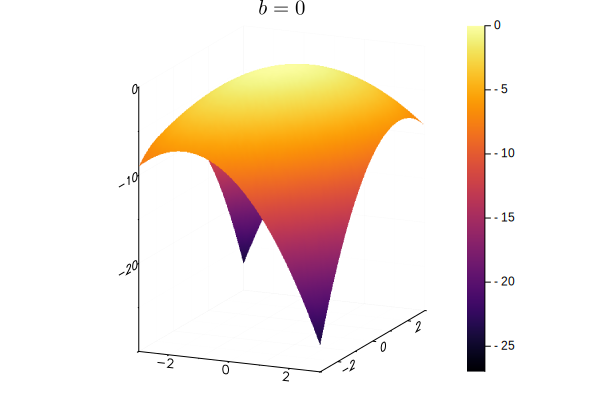

In [40]:
plot(xrange, xrange, fb, st = :surface, title = "\$b=0\$")

# Question 3

## Part 3a

Hessian is $H^c = \begin{bmatrix} -2 & 2 \\ 2 & -2 \end{bmatrix} $

## Part 3b

Determinant is $|H^c| = 0$, so the matrix is NSD, and we have a local maximum wherever $x=y$. 

## Part 3c

In [36]:
Hᶜ = [-2 2; 2 -2]

2×2 Array{Int64,2}:
 -2   2
  2  -2

In [37]:
@assert det(Hᶜ) == 0

In [38]:
fc(x,y) = -x^2 + 2x*y -y^2

fc (generic function with 1 method)

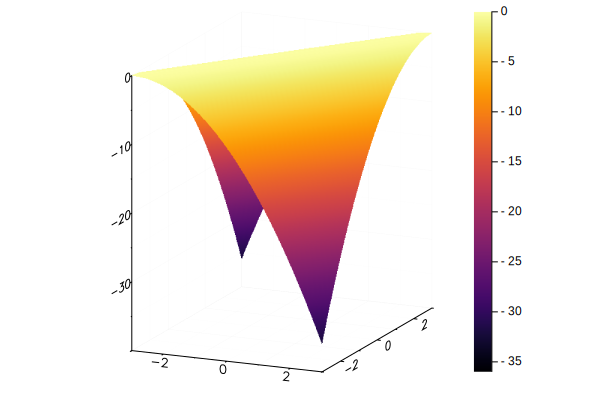

In [41]:
plot(xrange, xrange, fc, st = :surface)

# Question 4